In [1]:
#Let import our Libraries
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib_inline

In [6]:
pip install openml



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/158.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/158.0 kB ? eta -:--:--
   ------- ------------------------------- 30.7/158.0 kB 262.6 kB/s eta 0:00:01
   ------- ------------------------------- 30.7/158.0 kB 262.6 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/158.0 kB 252.2 kB/s eta 0:00:01
   ---------------------- ---------------- 92.2/158.0 kB 327.7 kB/s eta 0:00:01
   ----------------------------- -------- 122.9/158.0 kB 400.9 kB/s eta 0:00:01
   ------------------------------------ - 153.6/158.0 kB 418.0 kB/s eta 0:00:01
   ------------------------------------ - 153.6/158.0 kB 418.0 kB/s eta 0:00:01
   -------------------------------------- 158.0/158.0 kB 350.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/93.9 kB ? eta -:--:--
   ---------------------------------------  

In [23]:
import openml

# Load the California housing dataset
california_housing = openml.datasets.get_dataset(421)  # 421 is the dataset ID for California housing
X, y, _, _ = california_housing.get_data(target=california_housing.default_target_attribute)

# Convert to DataFrame
california_df = pd.DataFrame(X)
california_df['target'] = y


In [41]:
california_df.head(7)

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,oz11,oz12,oz13,oz14,oz15,oz16,oz17,oz18,oz19,oz20,oz21,oz22,oz23,oz24,oz25,oz26,oz27,oz28,oz29,oz30,oz31,oz32,oz33,oz34,oz35,oz36,oz37,oz38,oz39,oz40,oz41,oz42,oz43,oz44,oz45,oz46,oz47,oz48,oz49,oz50,oz51,oz52,oz53,target
0,0.001625,0.996102,0.008030,0.942999,0.017980,0.983481,0.000000,0.879747,0.011754,0.000000,0.617503,0.444541,0.468381,0.221788,0.999353,0.986801,0.302794,1.000000,0.835400,0.872528,0.998349,0.958191,0.944162,0.974697,0.969834,0.707128,0.065035,0.310678,0.183562,0.032804,0.973686,0.005336,0.004740,0.004508,0.181146,0.209146,0.000000,0.077877,0.103727,0.261929,0.186778,0.075082,0.000000,0.112778,0.144913,0.228481,0.045610,0.162287,0.290048,0.000000,0.000000,0.056817,0.061206,0.000000
1,0.745524,0.665663,0.734110,0.801867,0.766098,0.126606,0.532571,0.967088,0.207993,0.313418,0.933118,0.538895,0.500492,0.292822,0.997004,0.981963,0.844521,0.994020,0.897342,0.983828,0.996739,0.873422,0.884587,0.993163,0.754858,0.545060,0.058514,0.192697,0.027915,0.280294,0.799532,0.102010,0.057783,0.245882,0.485171,0.399651,0.415471,0.215000,0.220750,0.314031,0.496705,0.549541,0.453638,0.333331,0.210360,0.594585,0.087031,0.149286,0.205017,0.104263,0.597940,0.534088,0.857152,0.000000
2,0.000000,0.997702,0.000000,0.944366,0.007607,0.992683,0.005668,0.864557,0.000000,0.003950,0.609942,0.463686,0.481486,0.187689,0.998981,0.985577,0.235513,0.999932,0.819740,0.861444,0.997953,0.954735,0.939290,0.972650,0.827516,0.595011,0.050695,0.262569,0.152964,0.023744,0.825809,0.000000,0.000000,0.000000,0.953400,0.945358,0.072013,0.809105,0.819789,0.891968,0.734153,0.300773,0.572498,0.454149,0.822623,0.633431,0.110506,0.000000,0.057864,0.648393,0.046384,0.090899,0.000000,0.068018
3,0.642271,0.678788,0.709276,0.104425,0.766790,0.133946,0.407924,0.974683,0.204468,0.304372,0.472971,0.471676,1.000000,0.409302,0.986217,0.984433,0.740026,0.964789,0.780312,0.962895,0.983967,0.961481,0.963319,0.980142,0.052112,0.041222,0.042667,0.078656,0.007710,0.047111,0.063265,0.105736,0.057681,0.177937,0.667908,0.554195,0.830237,0.361233,0.341887,0.381639,0.511066,0.849966,0.779939,0.536990,0.215978,0.270406,0.155976,0.285716,0.147203,0.418090,0.530931,0.363634,0.551021,0.074835
4,0.003250,0.996984,0.002187,0.944139,0.012447,0.996326,0.004237,0.865823,0.003535,0.003950,0.795030,0.507076,0.469584,0.219802,0.999333,0.986736,0.297526,0.999970,0.834865,0.871402,0.998390,0.958281,0.943863,0.974655,0.989821,0.724454,0.065631,0.316861,0.187137,0.033522,0.989511,0.004369,0.004840,0.003506,0.867596,0.874182,0.063263,0.729318,0.757161,0.860587,0.000000,0.097872,0.508888,1.000000,0.438254,0.658259,0.244874,0.165677,0.042029,0.649776,0.097955,0.056817,0.061206,0.085044
5,0.002423,0.996984,0.004375,0.943910,0.013139,1.000000,0.004237,0.870886,0.007052,0.001572,0.616302,0.445987,0.470415,0.219006,0.999323,0.986816,0.299115,0.999950,0.835608,0.871541,0.998390,0.958502,0.944095,0.974779,1.000000,0.733343,0.066086,0.320274,0.189528,0.034012,1.000000,0.004623,0.004992,0.003696,0.352753,0.377011,0.016249,0.184330,0.214434,0.409691,0.412767,0.000000,0.127207,0.205199,0.308124,0.376155,0.062887,0.123041,0.200660,0.162445,0.082484,0.056817,0.061206,0.234685
6,0.054453,1.000000,0.029212,0.949840,0.000000,0.820179,0.004237,0.970885,0.165690,0.303979,0.283596,0.528286,0.528693,0.112025,0.867546,0.886905,0.374343,0.764165,0.196882,0.887558,0.869621,0.950495,0.945264,0.941492,0.000000,0.006483,0.000000,0.000000,0.001027,0.000000,0.000000,0.048946,0.013361,0.117662,0.592165,0.485947,0.365672,0.351915,0.367801,0.430351,0.592947,0.354503,0.693496,0.539680,0.163643,0.453145,0.155792,0.298227,0.126236,0.453401,0.623714,0.056817,0.061206,0.244895


In [43]:
#let check for missing value and perform EDA
missing_values = california_df.isnull().sum()
print("Missing values before cleaning:")
print(missing_values[missing_values > 0]) 

Missing values before cleaning:
Series([], dtype: int64)


In [44]:
duplicates = california_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    california_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

Number of duplicate rows: 0


In [46]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   oz1     31 non-null     float64
 1   oz2     31 non-null     float64
 2   oz3     31 non-null     float64
 3   oz4     31 non-null     float64
 4   oz5     31 non-null     float64
 5   oz6     31 non-null     float64
 6   oz7     31 non-null     float64
 7   oz8     31 non-null     float64
 8   oz9     31 non-null     float64
 9   oz10    31 non-null     float64
 10  oz11    31 non-null     float64
 11  oz12    31 non-null     float64
 12  oz13    31 non-null     float64
 13  oz14    31 non-null     float64
 14  oz15    31 non-null     float64
 15  oz16    31 non-null     float64
 16  oz17    31 non-null     float64
 17  oz18    31 non-null     float64
 18  oz19    31 non-null     float64
 19  oz20    31 non-null     float64
 20  oz21    31 non-null     float64
 21  oz22    31 non-null     float64
 22  oz23

In [47]:
california_df.describe

<bound method NDFrame.describe of          oz1       oz2       oz3  ...      oz52      oz53    target
0   0.001625  0.996102  0.008030  ...  0.056817  0.061206  0.000000
1   0.745524  0.665663  0.734110  ...  0.534088  0.857152  0.000000
2   0.000000  0.997702  0.000000  ...  0.090899  0.000000  0.068018
3   0.642271  0.678788  0.709276  ...  0.363634  0.551021  0.074835
4   0.003250  0.996984  0.002187  ...  0.056817  0.061206  0.085044
5   0.002423  0.996984  0.004375  ...  0.056817  0.061206  0.234685
6   0.054453  1.000000  0.029212  ...  0.056817  0.061206  0.244895
7   0.902438  0.634800  0.777206  ...  0.534088  0.857152  0.360541
8   0.762598  0.673112  0.804965  ...  0.386361  0.979611  0.374144
9   0.739833  0.668324  0.738494  ...  0.534088  0.061206  0.408159
10  0.736580  0.667081  0.731189  ...  0.534088  0.857152  0.452376
11  1.000000  0.000000  1.000000  ...  0.386361  1.000000  0.476184
12  0.521944  0.684109  0.452884  ...  0.000000  0.163257  0.482988
13  0.520319  

In [9]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#let initialize and fit the model
from sklearn.linear_model import LinearRegression
# Initialize the model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)



LinearRegression()

In [24]:
#let make prediction and evaluate our model
# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression")
print(f"Mean Squared Error: {linear_mse}")
print(f"mean_absolute_error: {linear_mae}")
print(f"R^2 Score: {linear_r2}\n")


Linear Regression
Mean Squared Error: 1.7530340661274386
mean_absolute_error: 0.9257371936973957
R^2 Score: -46.702261988651976



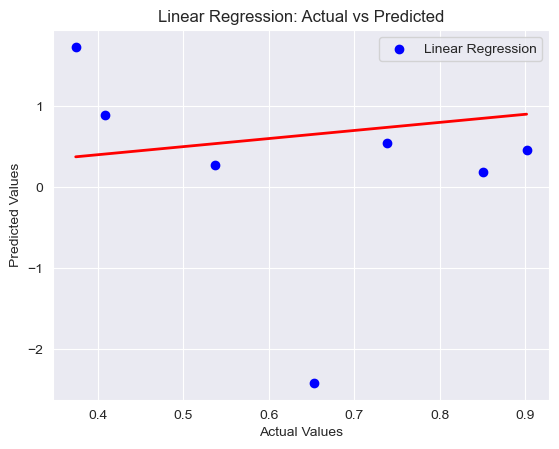

In [26]:
# Plot for Linear Regression
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [33]:
# Initialize the model
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)
tree_mae=mean_absolute_error(y_test,y_pred_tree)

print("Decision Tree Regression")
print(f"Mean Squared Error: {tree_mse}")
print(f"mean_absolute_error: {tree_mae}")
print(f"R^2 Score: {tree_r2}\n")

Decision Tree Regression
Mean Squared Error: 0.13262349557157144
mean_absolute_error: 0.3075818571428571
R^2 Score: -2.6088521346201947



In [34]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters for Decision Tree:", grid_search.best_params_)

# Use the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model
predictions_best_dt = best_dt_model.predict(X_test)
rmse_best_dt = np.sqrt(mean_squared_error(y_test, predictions_best_dt))
mae_best_dt = mean_absolute_error(y_test, predictions_best_dt)
r2_best_dt = r2_score(y_test, predictions_best_dt)

print("Best Decision Tree RMSE:", rmse_best_dt)
print("Best Decision Tree MAE:", mae_best_dt)
print("Best Decision Tree R²:", r2_best_dt)


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree RMSE: 0.2770056651572465
Best Decision Tree MAE: 0.20791951428571429
Best Decision Tree R²: -1.0879780066999305


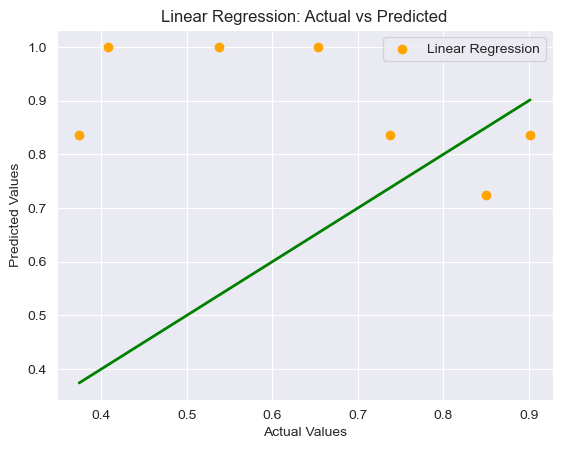

In [30]:
 #Plot for Linear Regression
plt.scatter(y_test, y_pred_tree, color='orange', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [35]:
# Initialize the model
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = random_forest_model.predict(X_test)

# Evaluate the model
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)
forest_mae=mean_absolute_error(y_test,y_pred_forest)

print("Random Forest Regression")
print(f"mean_absolute_error: {forest_mae}")
print(f"Mean Squared Error: {forest_mse}")
print(f"R^2 Score: {forest_r2}\n")


Random Forest Regression
mean_absolute_error: 0.14482409142857142
Mean Squared Error: 0.028683819780371034
R^2 Score: 0.21947718390826287



In [36]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define parameter grids for Ridge and Lasso
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Ridge and Lasso models
ridge_model = Ridge()
lasso_model = Lasso()

# Perform GridSearchCV for Ridge
ridge_search = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ridge_search.fit(X_train, y_train)

# Perform GridSearchCV for Lasso
lasso_search = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
lasso_search.fit(X_train, y_train)

# Evaluate Ridge model
best_ridge_model = ridge_search.best_estimator_
predictions_ridge = best_ridge_model.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, predictions_ridge))
r2_ridge = r2_score(y_test, predictions_ridge)
mae_ridge = mean_absolute_error(y_test, predictions_ridge)

print(f"Best Ridge Parameters: {ridge_search.best_params_}")
print(f"Ridge RMSE: {rmse_ridge}, R²: {r2_ridge}, MAE: {mae_ridge}")

# Evaluate Lasso model
best_lasso_model = lasso_search.best_estimator_
predictions_lasso = best_lasso_model.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, predictions_lasso))
r2_lasso = r2_score(y_test, predictions_lasso)
mae_lasso = mean_absolute_error(y_test, predictions_lasso)

print(f"Best Lasso Parameters: {lasso_search.best_params_}")
print(f"Lasso RMSE: {rmse_lasso}, R²: {r2_lasso}, MAE: {mae_lasso}")


Best Ridge Parameters: {'alpha': 10}
Ridge RMSE: 0.17826617989189783, R²: 0.13525803847516338, MAE: 0.15715710896922544
Best Lasso Parameters: {'alpha': 0.1}
Lasso RMSE: 0.23833951631709255, R²: -0.5457552312241747, MAE: 0.20146780357142857


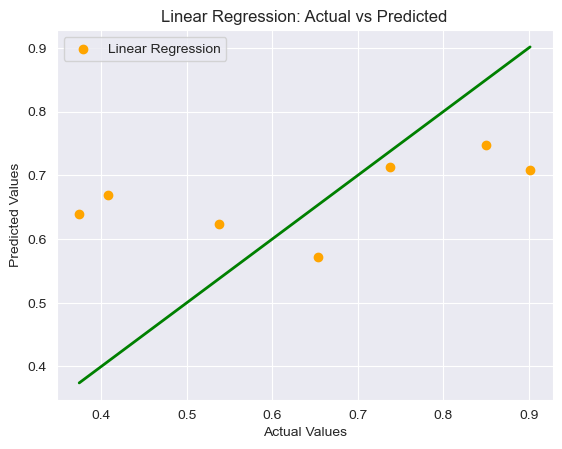

In [32]:
#Plot for Linear Regression
plt.scatter(y_test,y_pred_forest, color='orange', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()